Imports

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Load the dataset, visualize, pre-process

In [20]:
# Load the dataset
file_path = '/Users/adityadeshpande/Downloads/diabetes.csv'
diabetes_data = pd.read_csv(file_path)

diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
diabetes_data.shape

(768, 9)

In [22]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [24]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
outcome_counts = diabetes_data['Outcome'].value_counts()
print(outcome_counts)

0    500
1    268
Name: Outcome, dtype: int64


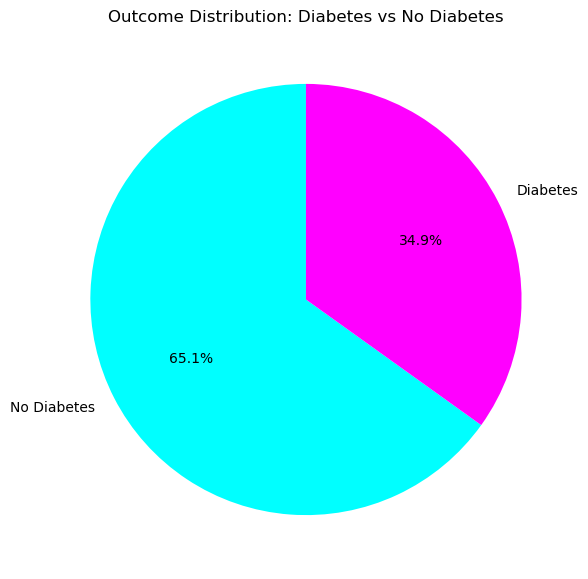

In [43]:
# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(outcome_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90, colors=['cyan','magenta'])
plt.title('Outcome Distribution: Diabetes vs No Diabetes')
plt.show()

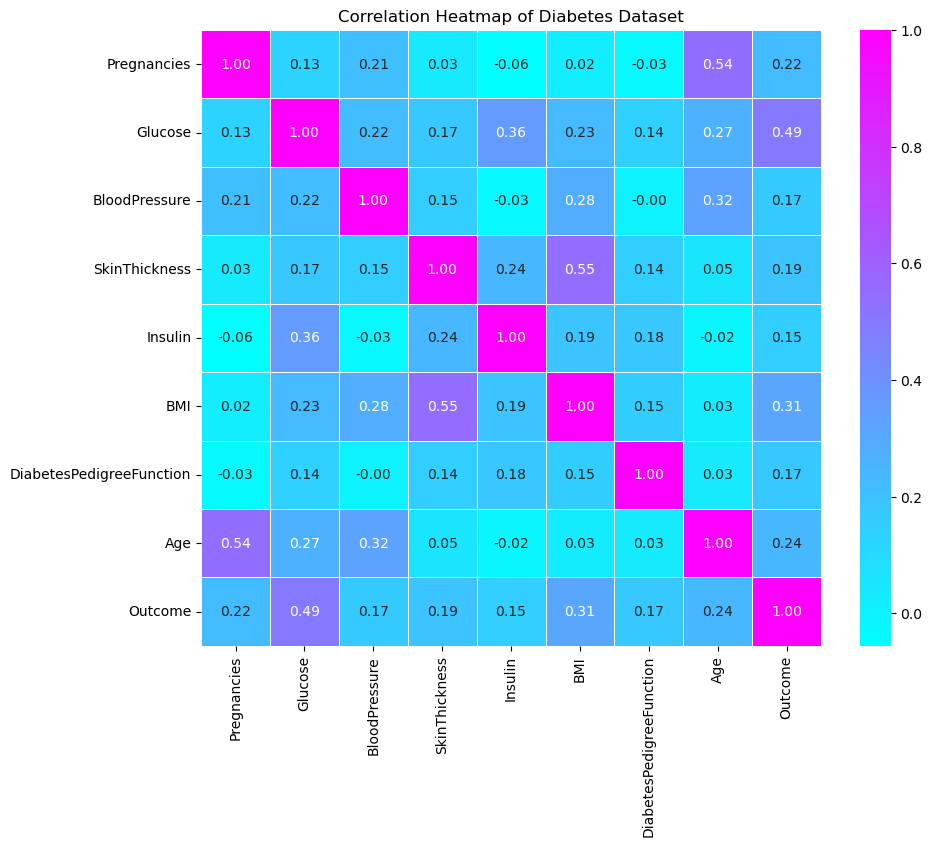

In [40]:
# Creating a correlation matrix for the heatmap
correlation_matrix = diabetes_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='cool', linewidths=0.5)
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()


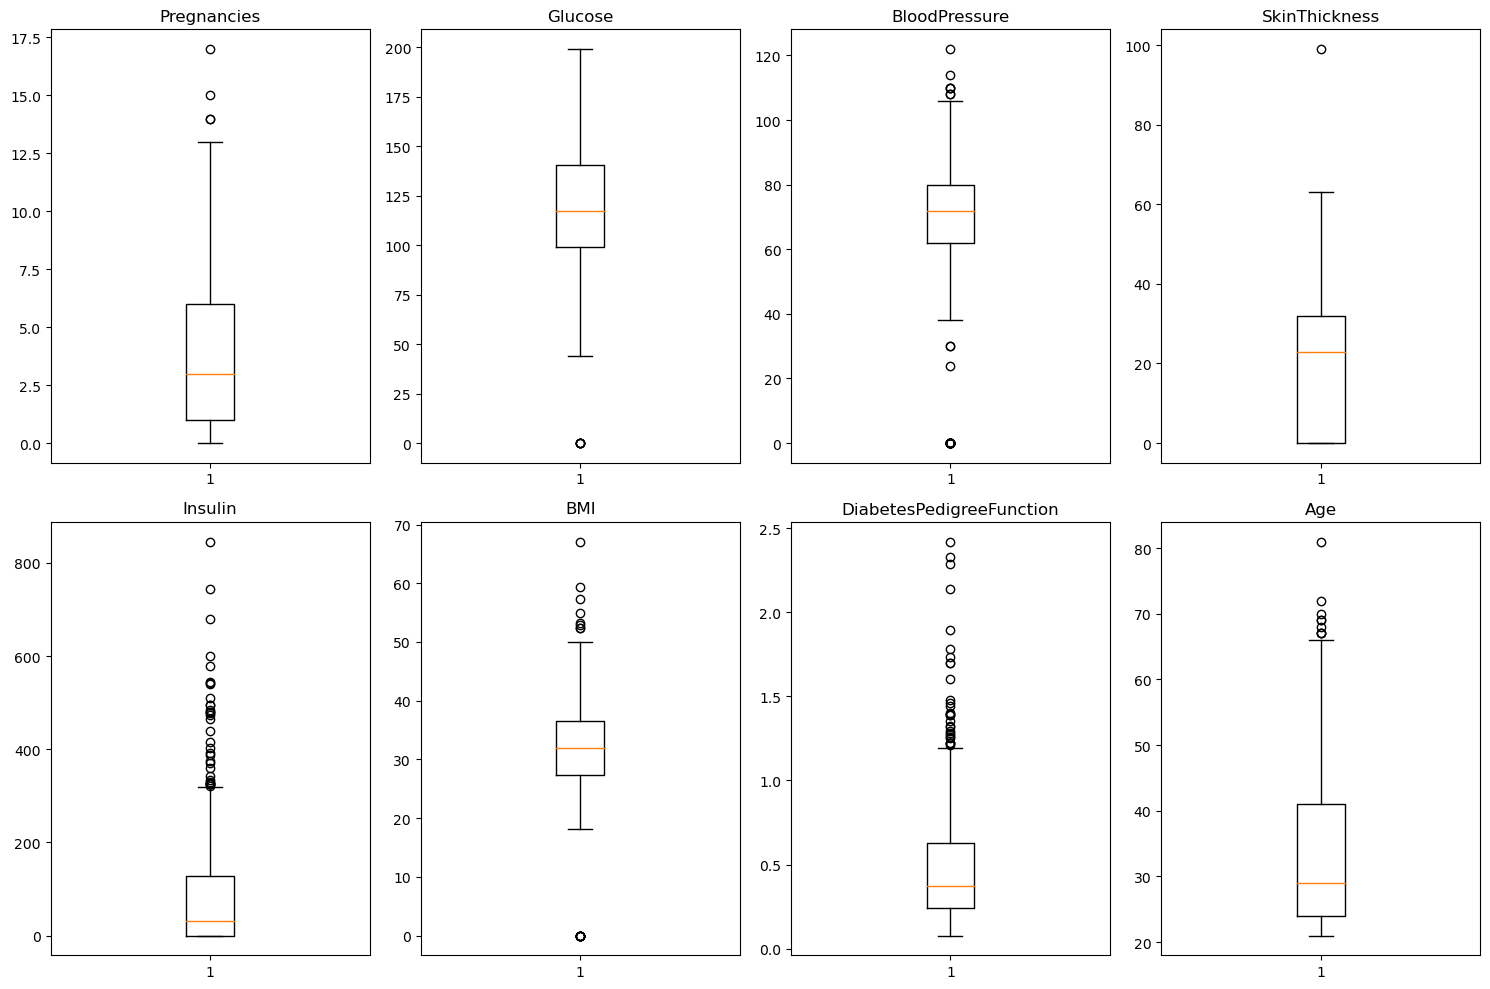

In [28]:
# List of numerical columns to plot boxplots
columns_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create boxplots for each column to visualize outliers
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 4, i)
    plt.boxplot(diabetes_data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [29]:
# Imputing outlier values (zeros) with median for relevant columns
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with the median in each of the selected columns
for column in columns_to_impute:
    median_value = diabetes_data[column].median()
    diabetes_data[column] = diabetes_data[column].replace(0, median_value)

# Display the updated statistics to verify the changes
diabetes_data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


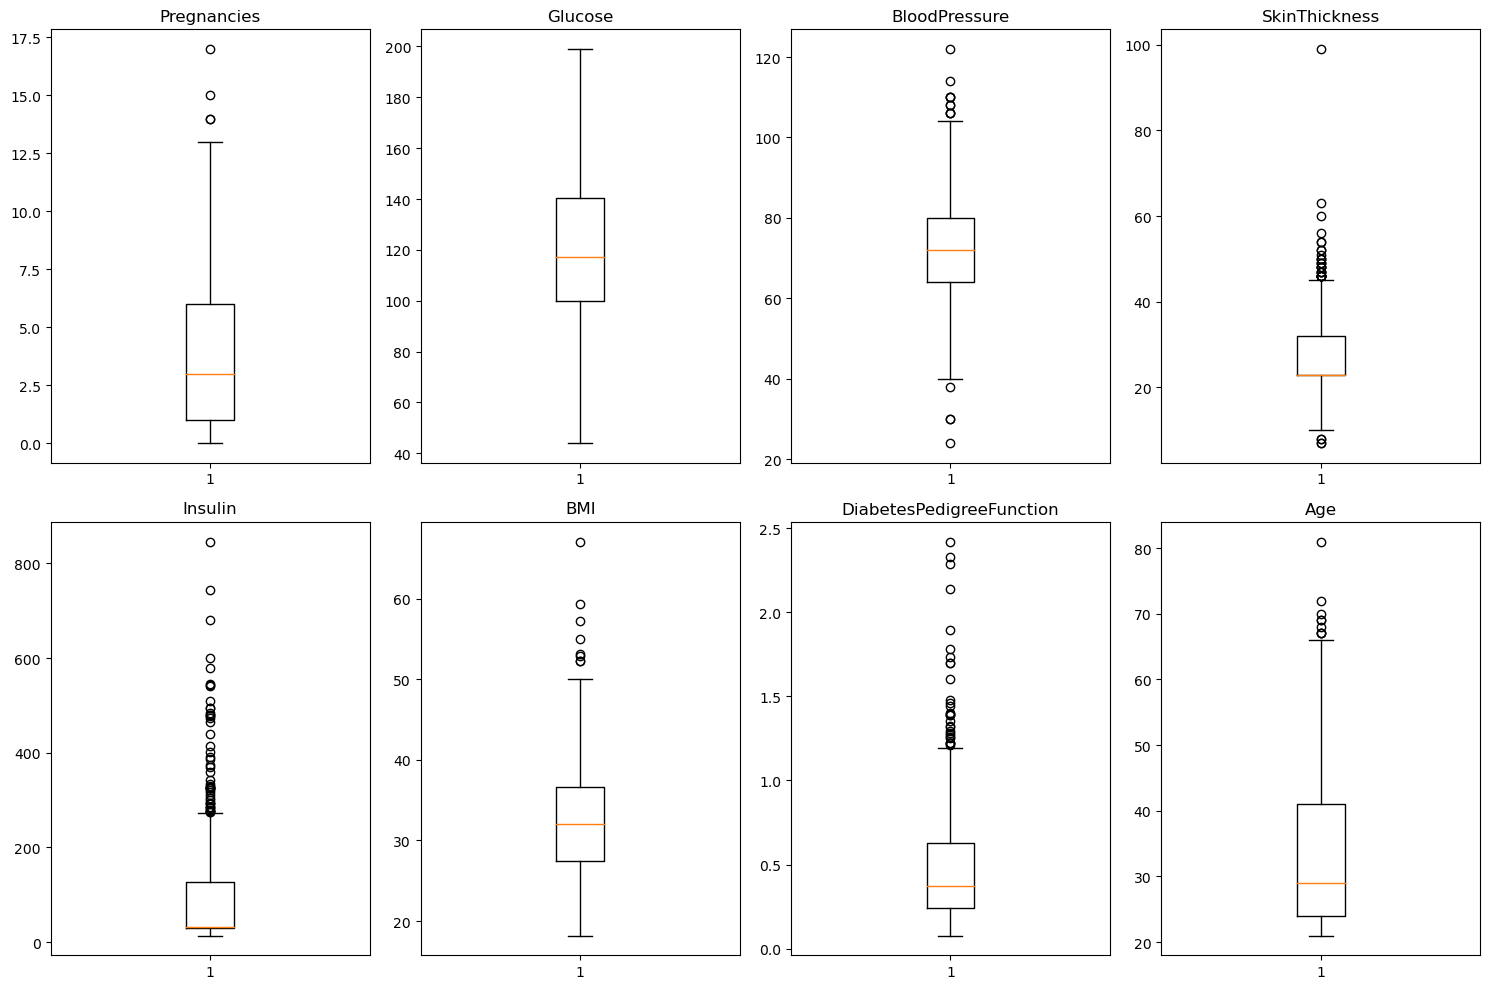

In [45]:
# Create boxplots for each column to visualize outliers in the imputed data
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 4, i)
    plt.boxplot(diabetes_data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [30]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


Spliting the data

In [31]:
# Splitting the features (X) and target (y)
X = diabetes_data.drop(columns=['Outcome'])
y = diabetes_data['Outcome']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Displaying the shapes of the resulting splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

Perceptron Model

In [32]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a single-layered perceptron
single_layer_percp = MLPClassifier(hidden_layer_sizes=(), max_iter=2000, random_state=12)
single_layer_percp.fit(X_train_scaled, y_train)
single_layer_predictions = single_layer_percp.predict(X_test_scaled)

# Train a multi-layered perceptron
multi_layer_percp = MLPClassifier(hidden_layer_sizes=(50, 20), max_iter=2000, random_state=12)
multi_layer_percp.fit(X_train_scaled, y_train)
multi_layer_predictions = multi_layer_percp.predict(X_test_scaled)

# Calculate evaluation metrics for both models
single_layer_metrics = {
    'Accuracy': accuracy_score(y_test, single_layer_predictions),
    'Precision': precision_score(y_test, single_layer_predictions),
    'Recall': recall_score(y_test, single_layer_predictions),
    'F1 Score': f1_score(y_test, single_layer_predictions)
}

multi_layer_metrics = {
    'Accuracy': accuracy_score(y_test, multi_layer_predictions),
    'Precision': precision_score(y_test, multi_layer_predictions),
    'Recall': recall_score(y_test, multi_layer_predictions),
    'F1 Score': f1_score(y_test, multi_layer_predictions)
}

# Print the results
print("Single-Layer Perceptron Metrics:")
print(single_layer_metrics)

print("\nMulti-Layer Perceptron Metrics:")
print(multi_layer_metrics)

Single-Layer Perceptron Metrics:
{'Accuracy': 0.8116883116883117, 'Precision': 0.76, 'Recall': 0.6909090909090909, 'F1 Score': 0.7238095238095238}

Multi-Layer Perceptron Metrics:
{'Accuracy': 0.7532467532467533, 'Precision': 0.660377358490566, 'Recall': 0.6363636363636364, 'F1 Score': 0.6481481481481481}


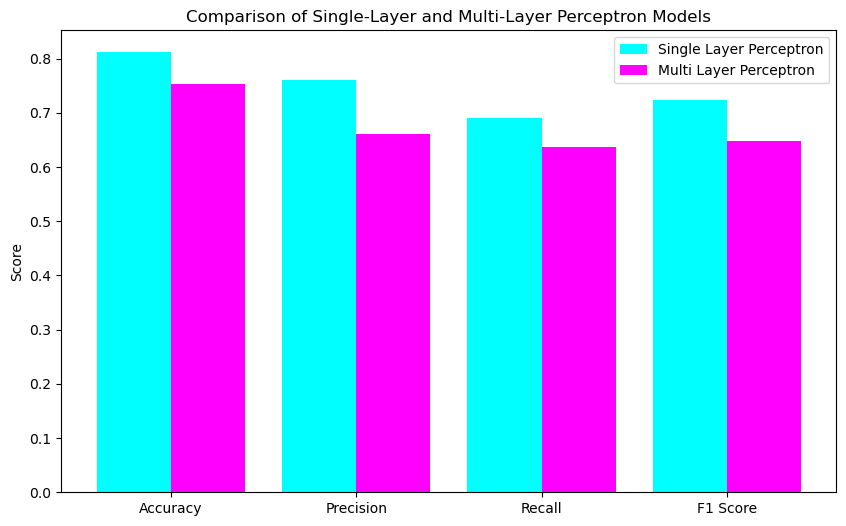

In [44]:
# Plotting the comparison of metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
single_layer_values = [single_layer_metrics[metric] for metric in metrics]
multi_layer_values = [multi_layer_metrics[metric] for metric in metrics]

x = np.arange(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, single_layer_values, width=0.4, label='Single Layer Perceptron', color='cyan')
plt.bar(x + 0.2, multi_layer_values, width=0.4, label='Multi Layer Perceptron', color='magenta')
plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Comparison of Single-Layer and Multi-Layer Perceptron Models')
plt.legend()
plt.show()

Random Forest Model

In [35]:
# Initializing the Random Forest model
random_forest_model = RandomForestClassifier(random_state=12)

# Training the model
random_forest_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Calculating evaluation metrics
test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1-Score: {f1:.2f}%")

Test Accuracy: 0.81%
Precision: 0.77%
Recall: 0.67%
F1-Score: 0.72%
